In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv("Online-eCommerce2.csv")
data

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11-01-2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11-01-2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11-01-2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11-01-2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11-01-2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,144464.0,TN,Rahul Kumar Prajapati,31-12-2022,Delivered,406 GB SSD,SSD,Samsung,4500.0,5850.0,1.0,4500.0,5850.0,Ajay Sharma
5106,144465.0,TR,Sagar Jeur,31-12-2022,Shipped,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Roshan Kumar
5107,144466.0,UK,Rhushikesh Mane,31-12-2022,Order,4GB Graphic card,Graphic Card,Nvidia,12500.0,16250.0,2.0,25000.0,32500.0,Aarvi Gupta
5108,144467.0,UP,Ashish Kumar,31-12-2022,Processing,158 GB DDR4 RAM,RAM,Hynix,3500.0,4550.0,2.0,7000.0,9100.0,Vijay Singh


In [3]:
data.shape

(5110, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB


In [5]:
data.describe()

,Order_Number,Cost,Sales,Quantity,Total_Cost,Total_Sales
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,141921.000000,6066.123651,7885.960746,2.486948,14991.778214,19489.311678
std,1470.944141,3952.022039,5137.628651,1.113581,12574.918427,16347.393955
min,139374.000000,350.000000,455.000000,1.000000,350.000000,455.000000
25%,140647.500000,2100.000000,2730.000000,2.000000,4500.000000,5850.000000
50%,141921.000000,6550.000000,8515.000000,2.000000,10720.000000,13936.000000
75%,143194.500000,8500.000000,11050.000000,3.000000,22950.000000,29835.000000
max,144468.000000,14500.000000,18850.000000,4.000000,58000.000000,75400.000000


In [ ]:
1.  75% orders are of cost less than 8500.


In [6]:
data['State_Code'].unique()

array(['AP', 'AS', 'BR', 'CG', nan, 'JK', 'JH', 'KA', 'KL', 'MN', 'ML',
       'MZ', 'NL', 'OR', 'PB', 'RJ', 'SK', 'TN', 'TR', 'UK', 'UP', 'WB',
       'AN', 'CH', 'AR', 'GA', 'GJ', 'MP', 'MH', 'DH', 'DD', 'DL', 'LD',
       'PY', 'HR', 'HP'], dtype=object)

In [7]:
data['Brand'].unique()

array(['Samsung', 'Intel', 'Nvidia', 'Hynix', 'Gigabyte', 'Asus', 'Dell',
       nan, 'Seagate', 'MSI', 'Acer', 'Western Digital'], dtype=object)

In [8]:
data.isnull().sum()

Order_Number           15
State_Code             15
Customer_Name          15
Order_Date             15
Status                 15
Product                15
Category               15
Brand                  15
Cost                   15
Sales                  15
Quantity               15
Total_Cost             15
Total_Sales            15
Assigned Supervisor    15
dtype: int64

In [9]:
df = data.groupby(['Category']).get_group('CPU')
df

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
1,139375.0,AP,Dannana Jhammi,11-01-2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
14,139385.0,KA,Ashish Kumar,16-01-2020,Order,Intel i5 12th gen.,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Advika Joshi
22,139393.0,OR,Ashish Pandey,22-01-2020,Processing,I7 - intel 12th Generation,CPU,Intel,14500.0,18850.0,2.0,29000.0,37700.0,Ajay Sharma
29,139399.0,UK,Rajesh Variya,25-01-2020,Processing,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,2.0,17000.0,22100.0,Roshan Kumar
39,139409.0,CH,Roshan Zameer,01-02-2020,Shipped,RYZEN 3rd gen. 3501,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Advika Joshi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5072,144431.0,WB,Firdoush Jabee,31-12-2022,Processing,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,2.0,17000.0,22100.0,Vijay Singh
5082,144441.0,AP,Vinod Mehta,31-12-2022,Shipped,RYZEN 3rd gen. 3649,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
5092,144451.0,JH,Shivanand Sahani,31-12-2022,Processing,Intel i5 12th gen.,CPU,Intel,8500.0,11050.0,1.0,8500.0,11050.0,Advika Joshi
5100,144459.0,NL,Ranjeet Kumar,31-12-2022,Processing,I7 - intel 12th Generation,CPU,Intel,14500.0,18850.0,2.0,29000.0,37700.0,Roshan Kumar


In [10]:
data['Assigned Supervisor'].unique()

array(['Ajay Sharma', 'Roshan Kumar', 'Aarvi Gupta', 'Vijay Singh',
       'Aadil Khan', 'Advika Joshi', nan], dtype=object)

<Axes: xlabel='count', ylabel='Category'>

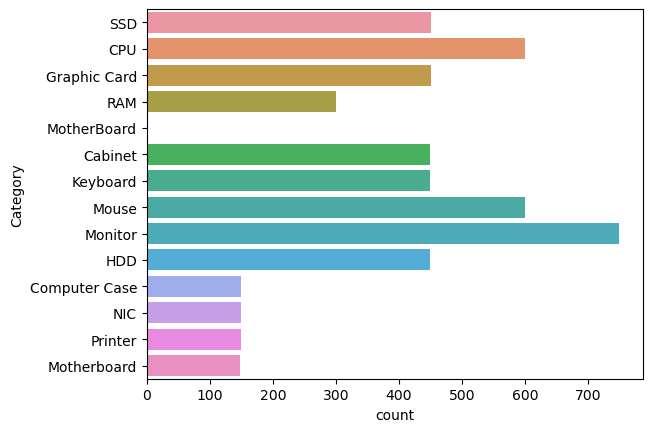

In [7]:
sns.countplot(y="Category",data = data)

In [ ]:
Monitor is mostly demanding order from user.

<Axes: xlabel='count', ylabel='Brand'>

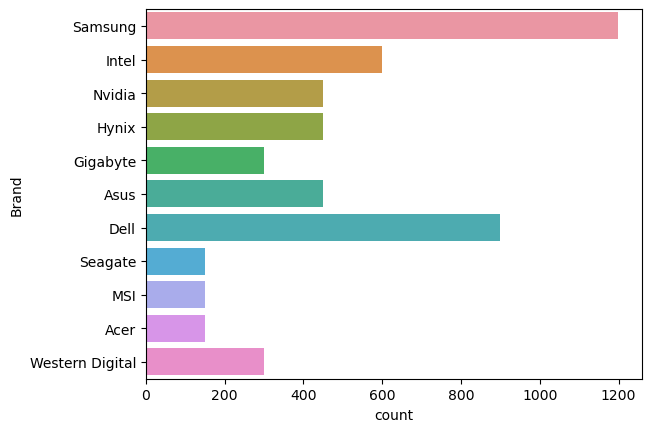

In [8]:
sns.countplot(y="Brand",data = data)

In [ ]:
Samsung is the brand which is mostly demanding and the products of Samsung are mostly ordered.

<Axes: xlabel='count', ylabel='Status'>

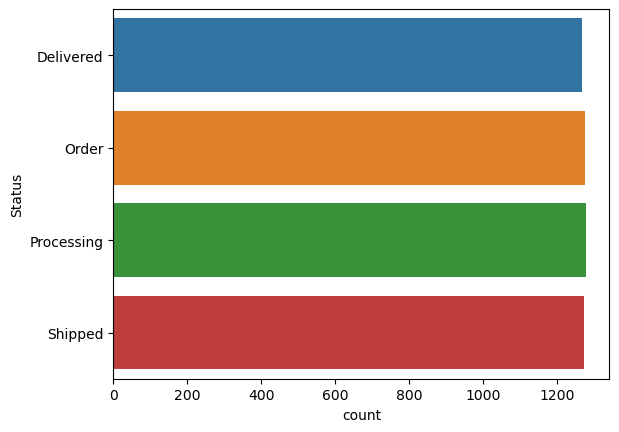

In [9]:
sns.countplot(y="Status",data = data)

In [ ]:
After Samsung , Dell is the mostly demanding brand.

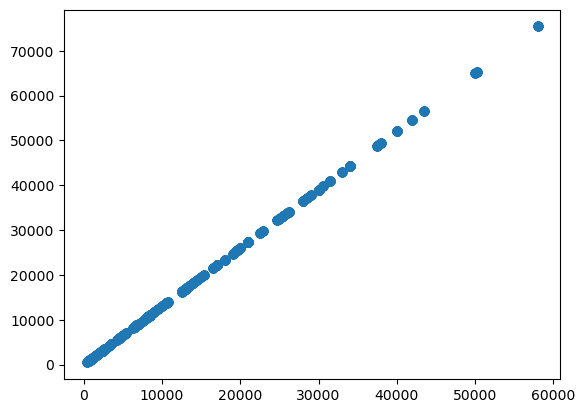

In [10]:
plt.scatter(data=data,x='Total_Cost', y='Total_Sales')
plt.show()

In [11]:
copied_data = data.copy()
copied_data

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11-01-2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11-01-2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11-01-2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11-01-2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11-01-2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,144464.0,TN,Rahul Kumar Prajapati,31-12-2022,Delivered,406 GB SSD,SSD,Samsung,4500.0,5850.0,1.0,4500.0,5850.0,Ajay Sharma
5106,144465.0,TR,Sagar Jeur,31-12-2022,Shipped,Intel i3 11th gen.,CPU,Intel,8500.0,11050.0,4.0,34000.0,44200.0,Roshan Kumar
5107,144466.0,UK,Rhushikesh Mane,31-12-2022,Order,4GB Graphic card,Graphic Card,Nvidia,12500.0,16250.0,2.0,25000.0,32500.0,Aarvi Gupta
5108,144467.0,UP,Ashish Kumar,31-12-2022,Processing,158 GB DDR4 RAM,RAM,Hynix,3500.0,4550.0,2.0,7000.0,9100.0,Vijay Singh


In [12]:
ecomerce_data_dummies = pd.get_dummies(copied_data)
ecomerce_data_dummies

,Order_Number,Cost,Sales,Quantity,Total_Cost,Total_Sales,State_Code_AN,State_Code_AP,State_Code_AR,State_Code_AS,...,Brand_Nvidia,Brand_Samsung,Brand_Seagate,Brand_Western Digital,Assigned Supervisor_Aadil Khan,Assigned Supervisor_Aarvi Gupta,Assigned Supervisor_Advika Joshi,Assigned Supervisor_Ajay Sharma,Assigned Supervisor_Roshan Kumar,Assigned Supervisor_Vijay Singh
0,139374.0,6500.0,8450.0,1.0,6500.0,8450.0,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,139375.0,8500.0,11050.0,3.0,25500.0,33150.0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,139376.0,7000.0,9100.0,2.0,14000.0,18200.0,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
3,139377.0,6550.0,8515.0,3.0,19650.0,25545.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,139378.0,7650.0,9945.0,4.0,30600.0,39780.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,144464.0,4500.0,5850.0,1.0,4500.0,5850.0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
5106,144465.0,8500.0,11050.0,4.0,34000.0,44200.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5107,144466.0,12500.0,16250.0,2.0,25000.0,32500.0,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
5108,144467.0,3500.0,4550.0,2.0,7000.0,9100.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


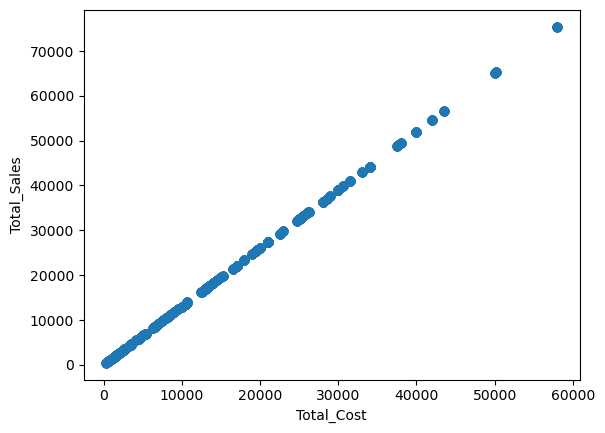

In [13]:
plt.scatter(data=ecomerce_data_dummies,x='Total_Cost', y='Total_Sales')
plt.xlabel("Total_Cost")
plt.ylabel("Total_Sales")
plt.show()